In [1]:
##MY DARE PROJECT 

### MY PERSONAL PROJECT

SO FOR EXAMPLE A STORE OWNER 
HIRES ME TO HELP PERFORM SOME SALES INSIGHT ON SHOP NAMED SHOPSMART.

THE TASK IS TO  SHOW SALES PERFORMANCE, CUSTOMER PATTERNS, AND PRODUCT TRENDS.

TOOLS TO USE - (PANDAS, MATPLOTLIB, SEABORN)
PD,PLT,SNS

SyntaxError: invalid syntax (1555939117.py, line 5)

In [3]:
import pandas as pd

customers = pd.read_csv("C:/Users/sunda/Downloads/customer data.csv")
orders = pd.read_csv("C:/Users/sunda/Downloads/orders data.csv")

orders['Date'] = orders['Date'].str.strip()

both_merged = pd.merge(customers, orders, on='CustomerID', how='inner')

print(both_merged.head())


   CustomerID CustomerName        City  Age  Gender  OrderID Product  \
0           1        Alice      London   28  Female      101  Laptop   
1           1        Alice      London   28  Female      107   Mouse   
2           2          Bob       Leeds   35    Male      102   Phone   
3           2          Bob       Leeds   35    Male      104      TV   
4           3      Charlie  Birmingham   40    Male      103   Chair   

      Category  Price  Quantity        Date PaymentType  
0  Electronics   1200         1  10/01/2024        Card  
1  Electronics     30         4  03/03/2024        Card  
2  Electronics    800         2  15/01/2024        Cash  
3  Electronics    500         1  10/02/2024        Card  
4    Furniture    150         3  20/01/2024        Card  


In [4]:
both_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    7 non-null      int64 
 1   CustomerName  7 non-null      object
 2   City          7 non-null      object
 3   Age           7 non-null      int64 
 4   Gender        7 non-null      object
 5   OrderID       7 non-null      int64 
 6   Product       7 non-null      object
 7   Category      7 non-null      object
 8   Price         7 non-null      int64 
 9   Quantity      7 non-null      int64 
 10  Date          7 non-null      object
 11  PaymentType   7 non-null      object
dtypes: int64(5), object(7)
memory usage: 804.0+ bytes


In [5]:
both_merged.describe()

,CustomerID,Age,OrderID,Price,Quantity
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2.571429,31.571429,104.000000,508.571429,2.000000
std,1.511858,5.255383,2.160247,445.212630,1.154701
min,1.000000,25.000000,101.000000,30.000000,1.000000
25%,1.500000,28.000000,102.500000,115.000000,1.000000
50%,2.000000,30.000000,104.000000,500.000000,2.000000
75%,3.500000,35.000000,105.500000,800.000000,2.500000
max,5.000000,40.000000,107.000000,1200.000000,4.000000


In [6]:
both_merged.drop_duplicates() ### REMOVING ANY DUPLICATES

,CustomerID,CustomerName,City,Age,Gender,OrderID,Product,Category,Price,Quantity,Date,PaymentType
0,1,Alice,London,28,Female,101,Laptop,Electronics,1200,1,10/01/2024,Card
1,1,Alice,London,28,Female,107,Mouse,Electronics,30,4,03/03/2024,Card
2,2,Bob,Leeds,35,Male,102,Phone,Electronics,800,2,15/01/2024,Cash
3,2,Bob,Leeds,35,Male,104,TV,Electronics,500,1,10/02/2024,Card
4,3,Charlie,Birmingham,40,Male,103,Chair,Furniture,150,3,20/01/2024,Card
5,4,Diana,London,30,Female,105,Lamp,Furniture,80,2,12/02/2024,Card
6,5,Ella,Liverpool,25,Female,106,Phone,Electronics,800,1,14/02/2024,Cash


In [7]:
## CREATING COLUMNS 
## both_merged everywhere instead of df lolll


both_merged['Total'] = both_merged['Price'] * both_merged['Quantity']
##new column first
print(both_merged[['Price', 'Quantity','Total']].head())

   Price  Quantity  Total
0   1200         1   1200
1     30         4    120
2    800         2   1600
3    500         1    500
4    150         3    450


In [60]:
####SO SECONDLY WE CREATE THE DATETIME COLUMN SUCH AS JAN-DEC FROM DATE
# Specify the exact format: day/month/year
both_merged['Date'] = pd.to_datetime(both_merged['Date'], format='%d/%m/%Y', errors='coerce')

both_merged['Month'] = both_merged['Date'].dt.month_name()
##new column first
print(both_merged[['Date','Month']].head()) ##VERY TRICKY ANYWAYS(STILL DONT FULLY UNDERTSAND

###NOW TO SAVE  OUR FILES

both_merged.to_csv('cleaned_shopsmart.csv',  index=False)

        Date     Month
0 2024-01-10   January
1 2024-03-03     March
2 2024-01-15   January
3 2024-02-10  February
4 2024-01-20   January


In [9]:
### FILTERING OUT THE DATA 

both_merged[both_merged['Price']> 100]

,CustomerID,CustomerName,City,Age,Gender,OrderID,Product,Category,Price,Quantity,Date,PaymentType,Total,Month
0,1,Alice,London,28,Female,101,Laptop,Electronics,1200,1,2024-01-10,Card,1200,January
2,2,Bob,Leeds,35,Male,102,Phone,Electronics,800,2,2024-01-15,Cash,1600,January
3,2,Bob,Leeds,35,Male,104,TV,Electronics,500,1,2024-02-10,Card,500,February
4,3,Charlie,Birmingham,40,Male,103,Chair,Furniture,150,3,2024-01-20,Card,450,January
6,5,Ella,Liverpool,25,Female,106,Phone,Electronics,800,1,2024-02-14,Cash,800,February


In [10]:
sorting = both_merged.sort_values(by = ['Price', 'CustomerName'], ascending = False)
print(sorting)

   CustomerID CustomerName        City  Age  Gender  OrderID Product  \
0           1        Alice      London   28  Female      101  Laptop   
6           5         Ella   Liverpool   25  Female      106   Phone   
2           2          Bob       Leeds   35    Male      102   Phone   
3           2          Bob       Leeds   35    Male      104      TV   
4           3      Charlie  Birmingham   40    Male      103   Chair   
5           4        Diana      London   30  Female      105    Lamp   
1           1        Alice      London   28  Female      107   Mouse   

      Category  Price  Quantity       Date PaymentType  Total     Month  
0  Electronics   1200         1 2024-01-10        Card   1200   January  
6  Electronics    800         1 2024-02-14        Cash    800  February  
2  Electronics    800         2 2024-01-15        Cash   1600   January  
3  Electronics    500         1 2024-02-10        Card    500  February  
4    Furniture    150         3 2024-01-20        Car

In [11]:
category_grouping = both_merged.groupby('Category')['Total'].sum().sort_values(ascending = False)

print(category_grouping)

Category
Electronics    4220
Furniture       610
Name: Total, dtype: int64


In [12]:
city_grouping = both_merged.groupby('City')['Total'].sum().sort_values(ascending= False)
print(city_grouping)

City
Leeds         2100
London        1480
Liverpool      800
Birmingham     450
Name: Total, dtype: int64


In [13]:
##TOP 3 PRODUCT CATEGORY - Identify top 3 product categories and top 3 cities by revenue.

top_product = both_merged.groupby('Category')['Total'].sum().sort_values(ascending = False).head(3)
print(top_product)

Category
Electronics    4220
Furniture       610
Name: Total, dtype: int64


In [14]:
top_city = both_merged.groupby('City')['Total'].sum().sort_values(ascending=False).head(3)
print(top_city)

City
Leeds        2100
London       1480
Liverpool     800
Name: Total, dtype: int64


In [9]:
##Create at least 5 charts using Matplotlib or Seaborn to communicate insights:

📈 #Line Chart – Show monthly sales trend.

📊#Bar Chart – Show total revenue by product category.

📉 # Histogram – Display product price distribution.

🔵 #Scatter Plot – Compare Quantity vs Total Revenue.

🟢# Bar Chart – Top 5 customers by total spending.


## MONTHLY SALES TREND 


SyntaxError: invalid character '📈' (U+1F4C8) (1499650874.py, line 3)

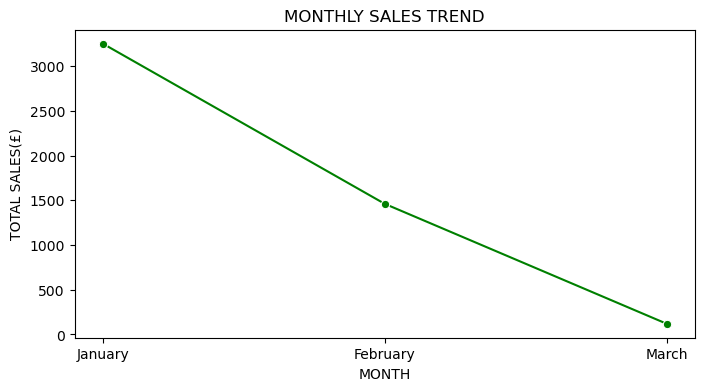

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns 

monthly_sales = both_merged.groupby('Month')['Total'].sum().reindex(['January','February','March','April',
                                    'May','June','July','August','September','October','November','December'])
plt.figure(figsize = (8, 4))
sns.lineplot(x = monthly_sales.index, y= monthly_sales.values, marker = 'o', color= 'green')
plt.title('MONTHLY SALES TREND')
plt.xlabel('MONTH')
plt.ylabel('TOTAL SALES(£)')
plt.show()

C:\Users\sunda\AppData\Local\Temp\ipykernel_16068\2059013687.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = category_revenue.index, y= category_revenue.values, palette='viridis')


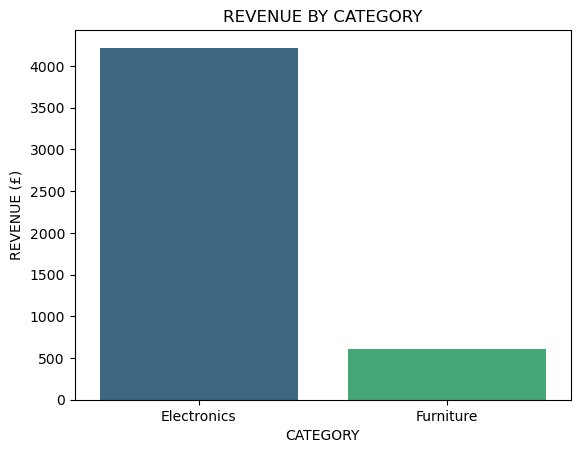

In [36]:
##GIVING SEABORN DATA ALREADY GROUP FIRST
## for bar chart
## CATEGORY REVENUE

category_revenue = both_merged.groupby('Category')['Total'].sum()
sns.barplot(x = category_revenue.index, y= category_revenue.values, palette='viridis')
plt.title('REVENUE BY CATEGORY')
plt.xlabel('CATEGORY')
plt.ylabel('REVENUE (£)')
plt.show()

C:\Users\sunda\AppData\Local\Temp\ipykernel_13812\2828696079.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=both_merged, x='Category', y='Total', palette='viridis', estimator=sum, errorbar=None)


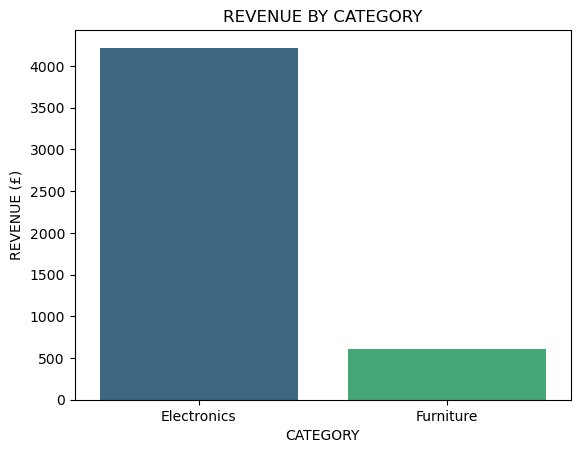

In [24]:


##OR GIVING SEABORN RAW DATA WITHOUT GROUPING FIRST

# No manual grouping line required!
# category_revenue = both_merged.groupby('Category')['Total'].sum() # <-- DELETE THIS LINE

# Give Seaborn the raw DataFrame and specify the columns
sns.barplot(data=both_merged, x='Category', y='Total', palette='viridis', estimator=sum, errorbar=None)
plt.title('REVENUE BY CATEGORY')
plt.xlabel('CATEGORY')
plt.ylabel('REVENUE (£)')
plt.show()

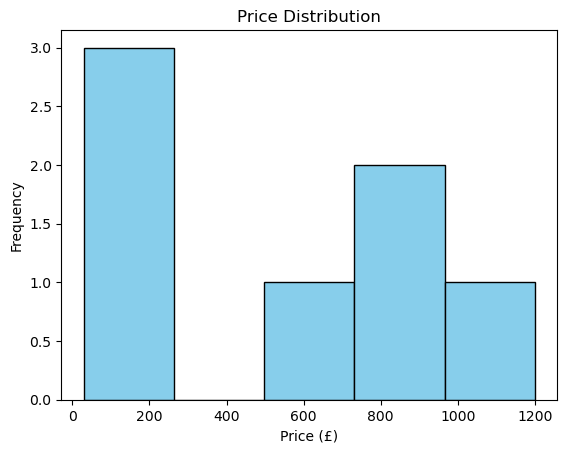

In [18]:
## product price distribution with an histogram
plt.hist(both_merged['Price'], bins=5, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

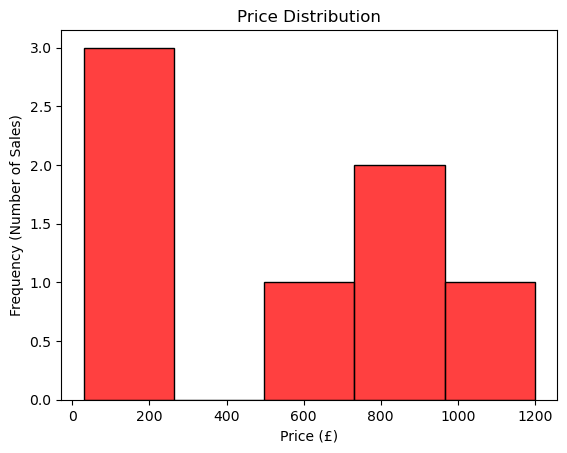

In [19]:
# Create the histogram using SEABORN
sns.histplot(data=both_merged, x='Price', bins=5, color='red', edgecolor='black')

# Add labels and title (using Matplotlib functions still works for Seaborn plots)
plt.title('Price Distribution')
plt.xlabel('Price (£)')
plt.ylabel('Frequency (Number of Sales)')
plt.show()

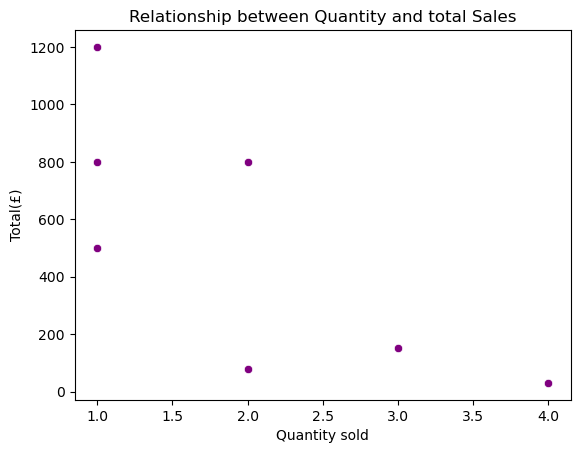

In [21]:
##COMPARING QUANTITY VS TOTAL
sns.scatterplot(data = both_merged, x='Quantity', y = 'Price', color = 'purple' )
plt.title('Relationship between Quantity and total Sales')
plt.xlabel('Quantity sold')
plt.ylabel('Total(£)')
plt.show()

C:\Users\sunda\AppData\Local\Temp\ipykernel_16068\1627629167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='coolwarm')


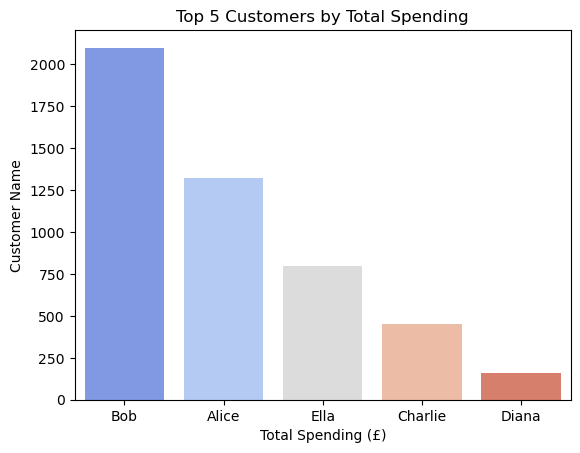

In [23]:
top_customers = both_merged.groupby('CustomerName')['Total'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_customers.index, y=top_customers.values, palette='coolwarm')
plt.title('Top 5 Customers by Total Spending')
plt.xlabel('Total Spending (£)')
plt.ylabel('Customer Name')
plt.show()


C:\Users\sunda\AppData\Local\Temp\ipykernel_16068\4166736724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = premium_customers.values, y=premium_customers.index, palette = 'rocket')


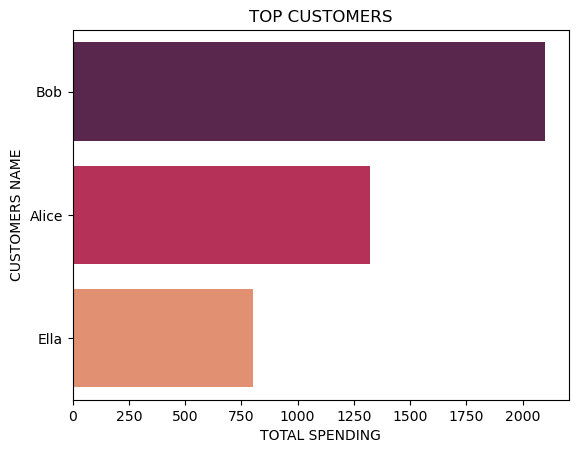

In [33]:
## OR CHANGING THE VALUES TO THE LEFT AND SIDE TO HAVE  ANOTHER SWEET CHART WITHY THE SAME INFORMA

premium_customers = both_merged.groupby('CustomerName')['Total'].sum().sort_values(ascending = False).head(3)
sns.barplot(x = premium_customers.values, y=premium_customers.index, palette = 'rocket')
plt.title( 'TOP CUSTOMERS')
plt.xlabel('TOTAL SPENDING')
plt.ylabel('CUSTOMERS NAME')
plt.show()

In [ ]:
#### NOW SAVING M